In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df=pd.read_csv('Cricket.csv')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar�(INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara�(Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting�(AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya�(Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene�(Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [3]:
grouped_df=df[['Player','SR','Ave']]
grouped_df.head()


,Player,SR,Ave
0,SR Tendulkar�(INDIA),86.23,44.83
1,KC Sangakkara�(Asia/ICC/SL),78.86,41.98
2,RT Ponting�(AUS/ICC),80.39,42.03
3,ST Jayasuriya�(Asia/SL),91.20,32.36
4,DPMD Jayawardene�(Asia/SL),78.96,33.37


In [4]:
#Resacling
rfm_df = grouped_df[['SR', 'Ave']]

scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(79, 2)

In [5]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['SR','Ave']
rfm_df_scaled.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


In [6]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [7]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_df_scaled)

0.7703975212465425

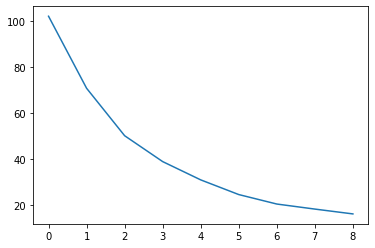

In [8]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

k=4

In [9]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.37632823237612395
For n_clusters=3, the silhouette score is 0.37185804193936567
For n_clusters=4, the silhouette score is 0.38853833179708763
For n_clusters=5, the silhouette score is 0.3631826669105036
For n_clusters=6, the silhouette score is 0.37717077216467404
For n_clusters=7, the silhouette score is 0.3782283021075151
For n_clusters=8, the silhouette score is 0.3716195410861668
For n_clusters=9, the silhouette score is 0.3919972629668421
For n_clusters=10, the silhouette score is 0.3647734703877538


In [10]:
# final model with k=3
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=100)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [11]:
kmeans.labels_

array([3, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 3, 2, 3, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 3, 2, 0, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 3, 3, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2])

In [12]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df

<ipython-input-12-837db4ca6943>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['cluster_id'] = kmeans.labels_


,Player,SR,Ave,cluster_id
0,SR Tendulkar�(INDIA),86.23,44.83,3
1,KC Sangakkara�(Asia/ICC/SL),78.86,41.98,1
2,RT Ponting�(AUS/ICC),80.39,42.03,1
3,ST Jayasuriya�(Asia/SL),91.20,32.36,0
4,DPMD Jayawardene�(Asia/SL),78.96,33.37,2
...,...,...,...,...
74,CG Greenidge�(WI),64.92,45.03,1
75,Misbah-ul-Haq�(PAK),73.75,43.40,1
76,PD Collingwood�(ENG),76.98,35.36,2
77,A Symonds�(AUS),92.44,39.75,0


In [13]:
#A
grouped_df[grouped_df['cluster_id'] ==3]

,Player,SR,Ave,cluster_id
0,SR Tendulkar�(INDIA),86.23,44.83,3
13,MS Dhoni�(Asia/INDIA),88.69,51.32,3
15,AB de Villiers�(Afr/SA),100.25,53.55,3
25,V Kohli�(INDIA),90.99,53.94,3
34,HM Amla�(SA),89.05,50.25,3
38,MG Bevan�(AUS),74.16,53.58,3
42,IVA Richards�(WI),90.20,47.00,3
63,MJ Guptill�(NZ),87.73,43.30,3
64,MEK Hussey�(AUS),87.16,48.15,3


In [14]:
#B
grouped_df[grouped_df['cluster_id'] ==2]

,Player,SR,Ave,cluster_id
4,DPMD Jayawardene�(Asia/SL),78.96,33.37,2
14,M Azharuddin�(INDIA),74.02,36.92,2
16,PA de Silva�(SL),81.13,34.90,2
22,MS Atapattu�(SL),67.72,37.57,2
26,HH Gibbs�(SA),83.26,36.13,2
28,SP Fleming�(ICC/NZ),71.49,32.40,2
30,SR Waugh�(AUS),75.91,32.90,2
31,A Ranatunga�(SL),77.90,35.84,2
33,Younis Khan�(PAK),75.29,31.24,2
35,Saleem Malik�(PAK),76.41,32.88,2


In [15]:
#D
grouped_df[grouped_df['cluster_id'] ==1]

,Player,SR,Ave,cluster_id
1,KC Sangakkara�(Asia/ICC/SL),78.86,41.98,1
2,RT Ponting�(AUS/ICC),80.39,42.03,1
5,Inzamam-ul-Haq�(Asia/PAK),74.24,39.52,1
6,JH Kallis�(Afr/ICC/SA),72.89,44.36,1
7,SC Ganguly�(Asia/INDIA),73.70,41.02,1
8,R Dravid�(Asia/ICC/INDIA),71.24,39.16,1
9,BC Lara�(ICC/WI),79.51,40.48,1
11,Mohammad Yousuf�(Asia/PAK),75.10,41.71,1
18,Saeed Anwar�(PAK),80.67,39.21,1
19,S Chanderpaul�(WI),70.74,41.60,1


In [16]:
#C
grouped_df[grouped_df['cluster_id'] ==0]

,Player,SR,Ave,cluster_id
3,ST Jayasuriya�(Asia/SL),91.20,32.36,0
10,TM Dilshan�(SL),86.23,39.27,0
12,AC Gilchrist�(AUS/ICC),96.94,35.89,0
17,CH Gayle�(ICC/WI),85.11,37.33,0
20,Yuvraj Singh�(Asia/INDIA),87.67,36.55,0
24,V Sehwag�(Asia/ICC/INDIA),104.33,35.05,0
27,Shahid Afridi�(Asia/ICC/PAK),117.00,23.57,0
50,BB McCullum�(NZ),96.37,30.41,0
57,EJG Morgan�(ENG/IRE),88.62,38.73,0
59,SR Watson�(AUS),90.44,40.54,0


<AxesSubplot:xlabel='cluster_id', ylabel='SR'>

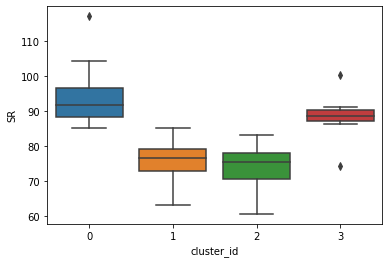

In [17]:
# plot
import seaborn as sns
sns.boxplot(x='cluster_id', y='SR', data=grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='Ave'>

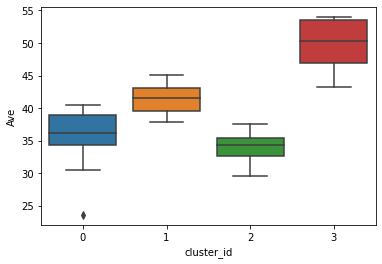

In [18]:
sns.boxplot(x='cluster_id', y='Ave', data=grouped_df)

In [19]:
rfm_df_scaled.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


In [20]:
grouped_df.head()

,Player,SR,Ave,cluster_id
0,SR Tendulkar�(INDIA),86.23,44.83,3
1,KC Sangakkara�(Asia/ICC/SL),78.86,41.98,1
2,RT Ponting�(AUS/ICC),80.39,42.03,1
3,ST Jayasuriya�(Asia/SL),91.20,32.36,0
4,DPMD Jayawardene�(Asia/SL),78.96,33.37,2


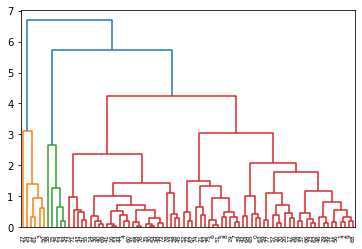

In [21]:
# single linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [22]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [23]:
# assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

<ipython-input-23-58ff4dd99a7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['cluster_labels'] = cluster_labels


,Player,SR,Ave,cluster_id,cluster_labels
0,SR Tendulkar�(INDIA),86.23,44.83,3,0
1,KC Sangakkara�(Asia/ICC/SL),78.86,41.98,1,0
2,RT Ponting�(AUS/ICC),80.39,42.03,1,0
3,ST Jayasuriya�(Asia/SL),91.20,32.36,0,1
4,DPMD Jayawardene�(Asia/SL),78.96,33.37,2,2


In [27]:
grouped_df[grouped_df['cluster_labels']==0]

,Player,SR,Ave,cluster_id,cluster_labels
0,SR Tendulkar�(INDIA),86.23,44.83,3,0
1,KC Sangakkara�(Asia/ICC/SL),78.86,41.98,1,0
2,RT Ponting�(AUS/ICC),80.39,42.03,1,0
5,Inzamam-ul-Haq�(Asia/PAK),74.24,39.52,1,0
6,JH Kallis�(Afr/ICC/SA),72.89,44.36,1,0
7,SC Ganguly�(Asia/INDIA),73.70,41.02,1,0
8,R Dravid�(Asia/ICC/INDIA),71.24,39.16,1,0
9,BC Lara�(ICC/WI),79.51,40.48,1,0
10,TM Dilshan�(SL),86.23,39.27,0,0
11,Mohammad Yousuf�(Asia/PAK),75.10,41.71,1,0


In [28]:
grouped_df[grouped_df['cluster_labels']==1]

,Player,SR,Ave,cluster_id,cluster_labels
3,ST Jayasuriya�(Asia/SL),91.20,32.36,0,1
12,AC Gilchrist�(AUS/ICC),96.94,35.89,0,1
24,V Sehwag�(Asia/ICC/INDIA),104.33,35.05,0,1
27,Shahid Afridi�(Asia/ICC/PAK),117.00,23.57,0,1
50,BB McCullum�(NZ),96.37,30.41,0,1
61,SK Raina�(INDIA),93.76,35.46,0,1


In [29]:
grouped_df[grouped_df['cluster_labels']==2]

,Player,SR,Ave,cluster_id,cluster_labels
4,DPMD Jayawardene�(Asia/SL),78.96,33.37,2,2
14,M Azharuddin�(INDIA),74.02,36.92,2,2
16,PA de Silva�(SL),81.13,34.90,2,2
28,SP Fleming�(ICC/NZ),71.49,32.40,2,2
30,SR Waugh�(AUS),75.91,32.90,2,2
31,A Ranatunga�(SL),77.90,35.84,2,2
33,Younis Khan�(PAK),75.29,31.24,2,2
35,Saleem Malik�(PAK),76.41,32.88,2,2
36,NJ Astle�(NZ),72.64,34.92,2,2
40,A Flower�(ZIM),74.59,35.34,2,2


In [30]:
grouped_df[grouped_df['cluster_labels']==3]

,Player,SR,Ave,cluster_id,cluster_labels
13,MS Dhoni�(Asia/INDIA),88.69,51.32,3,3
15,AB de Villiers�(Afr/SA),100.25,53.55,3,3
25,V Kohli�(INDIA),90.99,53.94,3,3
34,HM Amla�(SA),89.05,50.25,3,3
38,MG Bevan�(AUS),74.16,53.58,3,3


<AxesSubplot:xlabel='cluster_labels', ylabel='SR'>

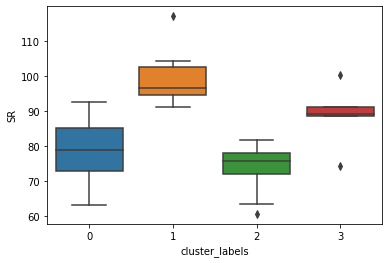

In [24]:
# plots
sns.boxplot(x='cluster_labels', y='SR', data=grouped_df)

<AxesSubplot:xlabel='cluster_labels', ylabel='Ave'>

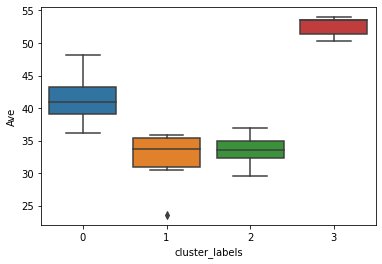

In [25]:
# plots
sns.boxplot(x='cluster_labels', y='Ave', data=grouped_df)